# Data Science Basics - Ensemble Learning - Complete Guide

#### What is Ensemble Learning?
We can define Ensemble Learning in this way it uses multiple machine learning models or multiple set of models for the same algorithm which try to make a better prediction.

Ensemble Learning model works by training different models on the same dataset and makes prediction iindividually and once the prediction is made then these results are combines with some statistical methods to get final prediction

In one sentence we can explain like this there is a dataset where multiple algorithms are trained on the same dataset and then finally predictions are made based on the outcomes of the individual machine learning algorithms.

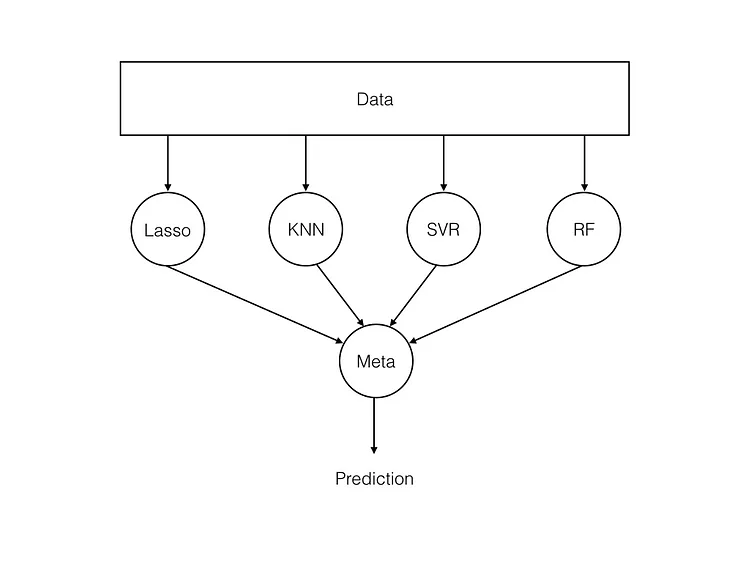

Let me explain this with an example of cricket team, in cricket team or any other team every few players are specialized in some fields(batting, fast bowling, fielding, keeping, … etc). In the same way every algorithm has its own feature set. There are multiple algorithms and they are specialized in some way so once we combine all of these algorithms it’s easy to get the final predictions.

#### Why Ensemble Learning?

Now we will try to understand why we use Ensemble learning:

If we try to start with a simple model to achive high accuracy by using single algorithm it might be endup with overfitting or underfitting.

Every model has its own strength and weakness. If we combine multiple models it will help us to hide weakness of individual models sothat we can cover weakness of others.

It creates some errors, The error emerging from any machine model can be broken down into three components mathematically. Following are these component:

 - Bias
 - Variance
 - Irreducible error
To understand these errors have a look at the following figure:

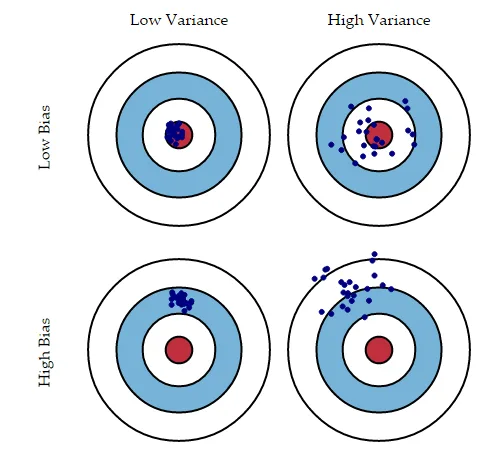

 - Bias error is useful to quantify how much on an average are the predicted values different from the actual value.

 - Variance on the other side quantifies how are the prediction made on the same observation different from each other.

Now we will try to understand bias - variance trade off from the following figure.
By increasing model complexity, total error will decrease till some point and then it will start to increase. W need to select optimum model complexity to get less error.

For low complexity model : high bias and low variance
For high complexity model : low bias and high variance

If you are getting high bias then you have a fair chance to increase model complexity. And otherside it you are getting high variance, you need to decrease model complexity that’s how any machine learning algorithm works.

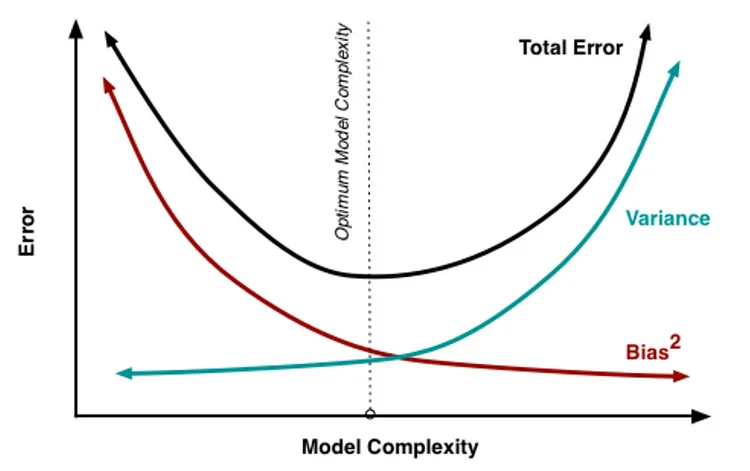

#### Let’s look into the types of Ensemble Learning:

#### Type of Ensemble Learning

#### Basic Ensemble Techniques
 - Max Voting
 - Averaging
 - Weighted Average

#### Advanced Ensemble Techniques
 - Stacking
 - Blending
 - Bagging
 - Boosting

#### Algorithms based on Bagging
 - Bagging meta-estimator
 - Random Forest
 
#### Boosting Algorithms
 - AdaBoost
 - GBM
 - XGB
 - Light GBM
 - CatBoost
 
#### Max Voting
The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point.

#### Averaging
Similar to the max voting technique, multiple predictions are made for each data point in averaging.

#### Weighted Average
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

#### Bagging
Bagging is also known as Bootstrapping. It is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

 - Combining predictions that belong to the same type.
 - Aim to decrease variance, not bias.
 - Different training data subsets are randomly drawn with replacement from the entire training dataset.
 
#### To explain bagging Random Forest(below figure) is the best example.
It creates multiple subsets like decision tree and it makes a prediction for each decision tree then if random forest is classifier it will take max voting otherwise if it is a regressor it will take avearge from each of these subset of the trees .

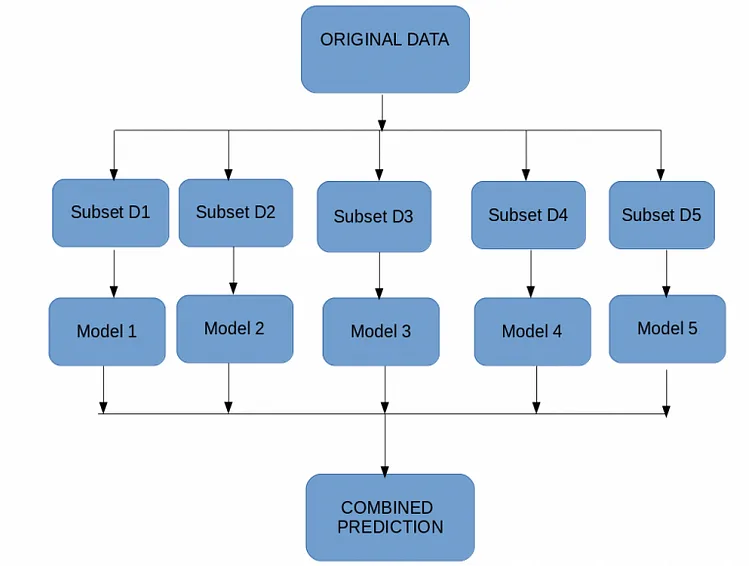

#### Boosting
Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.
Let’s understand the way boosting works in the below steps.

#### Combining predictions that belong to the different types.
 - Aim to decrease bias, not variance.
 - Models are weighted according to their performance.

Let’s now understand boosting from the following figure: At first we have our original dataset ,our first algorithm creates a plane there for that we have SVM classifier, Random Forest classifier, etc and it found out that there are some errors in the plane . To rectife that errors , we will train other model and after this again we will train other model which identifies errors.

Finally, we combine all three models together which perfectly classify our original dataset.

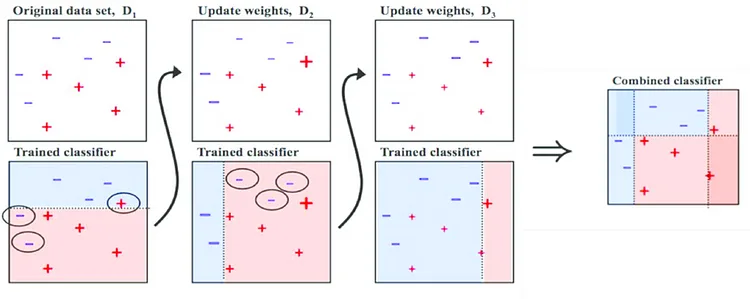

#### Algorithms Implimentation in sklearn
 - Bagging
 - Random Forest
 - Boosting
 - XGBosst
 - AdaBoost
 - Gradient Boosting
 
Random Forest is another ensemble machine learning algorithm that follows the bagging technique

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
X.shape, y.shape

If we see here scale of the each feature is different that is dome features are in the range 10s some are in 100s. It is better to standardize our data for better visualization.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

#### Install xgboost
conda install --name tensorflow20 -c conda-forge xgboost'

In [ ]:
import xgboost as xgb
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

#### RandomForestClassifier()
A random forest is a estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

#### AdaBoostClassifier()
It is a estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

#### GradientBoostingClassifier()
It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

#### XGBClassifier()
Data Matrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

Let’s have a look at the following code:

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [ ]:
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

Let’s print the accuracies of Random Forest, AdaBoost, Gradient Boost, XGBoost.

In [ ]:
print("Random Forest: ", rfc.score(X_test, y_test))
print("AdaBoost: ", abc.score(X_test, y_test))
print("Gradient Boost: ", gbc.score(X_test, y_test))
print("XGBoost: ", xgb_clf.score(X_test, y_test))